In [1]:
import matplotlib.pyplot as plt
import pandas as pd

**Protocol:**
- Dataset: Allen Cahn with Periodic BC and BDF time integrator
- The validation and test set sizes are kept fixed
- Only the training size is varied
- Here, the index of dataframes (2, 5, 10, etc.) refers to the percentage of the training data used
- Subset is randomly selected from the training set data. Here, n% means n% of timeseries, each having 100 or 50 timesteps

**Number of batch (batch size=16) for each subset:**
Subset (%) | Num_batch
--- | ---
2 | 69
5 | 170
10 | 333
20 | 666
40 | 1330
60 | 2023
80 | 2690
100 | 3370

In [2]:
phy = pd.DataFrame(columns=['PSNR', 'SSIM', 'MSE', 'H1', 'Train+Val time (minutes)'])
no_phy = pd.DataFrame(columns=['PSNR', 'SSIM', 'MSE', 'H1', 'Train+Val time (minutes)'])

In [3]:
phy.loc[2] = 27.698170159312514,0.7808334120491675,0.03491706332164134,50.216907022906135, 204.08
no_phy.loc[2] = 24.528395977520248,0.6713362337724,0.043233287846358916,57.25518374599654, 212.24

phy.loc[5] = 30.163410442500137,0.8291481499478761,0.023871529525555383,34.31176010501838, 226.88
no_phy.loc[5] = 26.997603906377652,0.7632220420782231,0.02983763961395621,39.14613885640029, 221.88

phy.loc[10] = 31.813709381397285,0.8608085285719435,0.021897666516239235,31.99104535136833, 249.33
no_phy.loc[10] = 28.723993267062674,0.8133798946397421,0.023052120184792087,32.372204824094375, 245.44

phy.loc[20] = 34.78677507704569,0.9430665585816198,0.006761202215650202,11.326713000229017, 315.12
no_phy.loc[20] = 30.702257757905763,0.8710920072089291,0.01440335867439503,22.355921638989816, 324.21

phy.loc[40] = 35.46569352812021,0.9500868403147562,0.006677186999730684,10.91664676410475, 449.72
no_phy.loc[40] = 31.98924285501604,0.9052844110417961,0.011050501899152292,17.802142635958987, 415.55

phy.loc[60] = 36.54035467319831,0.9584413319807437,0.004667208390626363,8.205895058357372, 540.99
no_phy.loc[60] = 32.70724028098483,0.9119350467357076,0.010239368591229415,17.074519578558924, 526.46

phy.loc[80] = 36.4882803148657,0.958638889306943,0.004543519582357408,8.238427216430317, 782.86
no_phy.loc[80] = 32.65510422555772,0.9084563909742593,0.011240394148237425,18.836875988313714, 777.71

phy.loc[100] = 37.27479402558142,0.9651788410781005,0.00405540733345567,7.237192213714728, 853.64
no_phy.loc[100] = 32.44001455102469,0.9083833506067559,0.01110022178424288,18.14477053597181, 810.40

In [4]:
print('Physics:\n', phy)
print('\nNo Physics:\n', no_phy)

Physics:
           PSNR      SSIM       MSE         H1  Train+Val time (minutes)
2    27.698170  0.780833  0.034917  50.216907                    204.08
5    30.163410  0.829148  0.023872  34.311760                    226.88
10   31.813709  0.860809  0.021898  31.991045                    249.33
20   34.786775  0.943067  0.006761  11.326713                    315.12
40   35.465694  0.950087  0.006677  10.916647                    449.72
60   36.540355  0.958441  0.004667   8.205895                    540.99
80   36.488280  0.958639  0.004544   8.238427                    782.86
100  37.274794  0.965179  0.004055   7.237192                    853.64

No Physics:
           PSNR      SSIM       MSE         H1  Train+Val time (minutes)
2    24.528396  0.671336  0.043233  57.255184                    212.24
5    26.997604  0.763222  0.029838  39.146139                    221.88
10   28.723993  0.813380  0.023052  32.372205                    245.44
20   30.702258  0.871092  0.014403  22.3

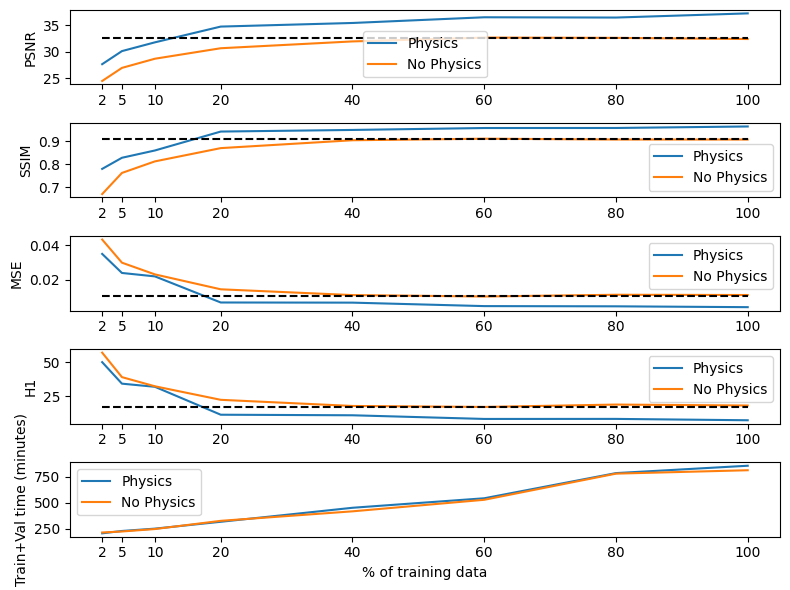

In [6]:
fig, axs = plt.subplots(nrows=len(phy.columns), ncols=1, figsize=(8, 6))

for i, column in enumerate(phy.columns):
    axs[i].plot(phy[column], label='Physics')
    axs[i].plot(no_phy[column], label='No Physics')
    axs[i].set_ylabel(column)
    axs[i].set_xticks(phy.index, phy.index.astype(str))  # Set xticks to index values
    axs[i].legend()

    if i in [0,1]:
        max_no_phy = max(no_phy[column])
        axs[i].plot([2,100],[max_no_phy,max_no_phy], 'k--')

    elif i in [2, 3]:
        min_no_phy = min(no_phy[column])
        axs[i].plot([2,100],[min_no_phy,min_no_phy], 'k--')

plt.xlabel('% of training data')
plt.tight_layout()
plt.show()
